In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from scipy.optimize import curve_fit
import numpy as np
import itertools as iter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
# Load the dataset
df = pd.read_csv('/content/gdrive/My Drive/Project/API_EN.ATM.CO2E.PP.GD_DS2_en_csv_v2_5456702.csv')
df.describe()

# Select the columns to be used for clustering
cols = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']

# Impute NaN values with the mean of the corresponding column
df[cols] = df[cols].fillna(df[cols].mean())

# Normalize the data
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])



Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                        Indicator Name     Indicator Code  1960  1961  1962  \
0  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   
1  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   
2  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   
3  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   
4  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   

   1963  1964  1965  ...      2013          2014          2015          2016  \
0   0.0   0.0   0.0  ...  0.000000  2.231421e-16  2.261394e-16 -2.212564e-16   
1   0.0   0.0   0.0  ...  0.490691  5.082473e-01  3.741109e-01  2.746347e-01   
2   0.0   0.0   0.0  ... -1.079985 -1.256145e+00 -1.179631e+00 -1.205679e+00   
3   0.0   0.0   0.0  ... -0.819281 -8.406753e-01 -8.838436e-01 -8.304237e-01   
4   0.0   0.0   0.0  ... -0.754406 -7.432357e-01 -5.938393e-01 -6.506594e-01   

           2017      2018      2019  2020  2021  2022  
0  2.272364e-16  0.000000  0.000000   0.0   0.0   0.0  
1  2.940613e-01  0.275884  0.317288   0.0   0.0   0.0  
2 -1.272718e+00 -1.145808 -1.161562   0.0   0.0   0.0  
3 -8.357372e-01 -0.831438 -0.805583   0.0   0.0   0.0  
4 -8.861697e-01 -0.884604 -0.811636   0.0   0.0   0.0  

[5 rows x 67 columns]

In [5]:
# Replace NaN values with mean
df = df.fillna(0)
df.head()

Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                        Indicator Name     Indicator Code  1960  1961  1962  \
0  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   
1  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   
2  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   
3  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   
4  CO2 emissions (kg per PPP $ of GDP)  EN.ATM.CO2E.PP.GD   0.0   0.0   0.0   

   1963  1964  1965  ...      2013          2014          2015          2016  \
0   0.0   0.0   0.0  ...  0.000000  2.231421e-16  2.261394e-16 -2.212564e-16   
1   0.0   0.0   0.0  ...  0.490691  5.082473e-01  3.741109e-01  2.746347e-01   
2   0.0   0.0   0.0  ... -1.079985 -1.256145e+00 -1.179631e+00 -1.205679e+00   
3   0.0   0.0   0.0  ... -0.819281 -8.406753e-01 -8.838436e-01 -8.304237e-01   
4   0.0   0.0   0.0  ... -0.754406 -7.432357e-01 -5.938393e-01 -6.506594e-01   

           2017      2018      2019  2020  2021  2022  
0  2.272364e-16  0.000000  0.000000   0.0   0.0   0.0  
1  2.940613e-01  0.275884  0.317288   0.0   0.0   0.0  
2 -1.272718e+00 -1.145808 -1.161562   0.0   0.0   0.0  
3 -8.357372e-01 -0.831438 -0.805583   0.0   0.0   0.0  
4 -8.861697e-01 -0.884604 -0.811636   0.0   0.0   0.0  

[5 rows x 67 columns]

In [13]:
# Normalize the data
scaler = StandardScaler()
df[cols] = scaler.fit_transform(df[cols])

In [23]:
# Apply K-means clustering
k = 7 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(df[cols])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
# Add cluster labels as a new column to the dataframe
df['Cluster'] = cluster_labels

In [25]:
df['Cluster'].value_counts()

3    92
6    57
1    52
5    36
2    18
0     8
4     3
Name: Cluster, dtype: int64

In [26]:
# Use logical slicing to select the data for plotting
data = df.loc[df['Cluster'].isin([2, 0, 6,3,9,8, 7, 1, 5, 4])]

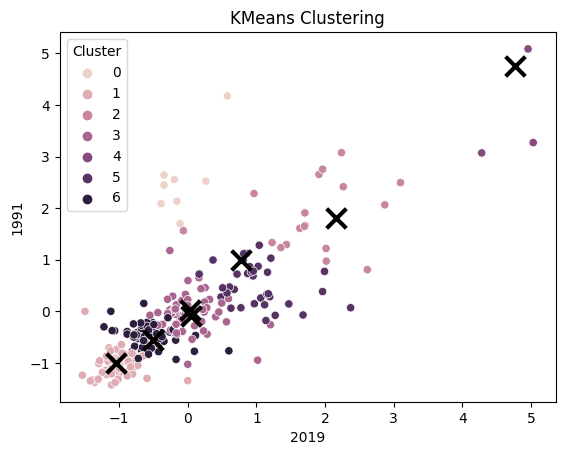

In [27]:
sns.scatterplot(data=data, x='2019', y='2009', hue='Cluster')
plt.scatter(x=kmeans.cluster_centers_[:, 4], y=kmeans.cluster_centers_[:, 10], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('2019')
plt.ylabel('1991')
plt.title('KMeans Clustering')
plt.show()

In [29]:
# Find one country from each cluster
countries = []
for i in [2, 0, 6,3,9,8, 7, 1, 5, 4]:
    cluster_data = df[df['Cluster'] == i]
    if not cluster_data.empty:
        country = cluster_data.sample(1)['Country Code'].values[0]
        countries.append(country)


        
countries

['ZAF', 'ATG', 'EUU', 'HIC', 'BGD', 'MEA', 'PLW']

In [31]:
# Compare the countries from one cluster to find similarities and differences
cluster_data = df[df['Cluster'] == 0]  # replace 0 with the cluster number you want to compare
cluster_data = cluster_data.drop(['Country Code', 'Cluster'], axis=1)
mean_values = cluster_data.mean()
max_values = cluster_data.max()
min_values = cluster_data.min()


print("Countries selected from each cluster:", countries)
print("Mean values for the selected cluster:\n", mean_values)
print("Maximum values for the selected cluster:\n", max_values)
print("Minimum values for the selected cluster:\n", min_values)

Countries selected from each cluster: ['ZAF', 'ATG', 'EUU', 'HIC', 'BGD', 'MEA', 'PLW']
Mean values for the selected cluster:
 1960    0.000000
1961    0.000000
1962    0.000000
1963    0.000000
1964    0.000000
          ...   
2018   -0.109046
2019   -0.088602
2020    0.000000
2021    0.000000
2022    0.000000
Length: 63, dtype: float64
Maximum values for the selected cluster:
 Country Name           St. Vincent and the Grenadines
Indicator Name    CO2 emissions (kg per PPP $ of GDP)
Indicator Code                      EN.ATM.CO2E.PP.GD
1960                                              0.0
1961                                              0.0
                                 ...                 
2018                                         0.497957
2019                                         0.577789
2020                                              0.0
2021                                              0.0
2022                                              0.0
Length: 66, dtype: obje

<ipython-input-31-4a4316183419>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = cluster_data.mean()


In [32]:
cluster_0_data = df[df['Cluster'] == 0]
cluster_1_data = df[df['Cluster'] == 1]
cluster_2_data = df[df['Cluster'] == 2]
cluster_3_data = df[df['Cluster'] == 3]
cluster_4_data = df[df['Cluster'] == 4]
cluster_5_data = df[df['Cluster'] == 5]
cluster_6_data = df[df['Cluster'] == 6]
# Extract the country codes for the data points in cluster 8
country_codes_0 = cluster_0_data['Country Code'].tolist()
country_codes_1 = cluster_1_data['Country Code'].tolist()
country_codes_2 = cluster_2_data['Country Code'].tolist()
country_codes_3 = cluster_3_data['Country Code'].tolist()
country_codes_4 = cluster_4_data['Country Code'].tolist()
country_codes_5 = cluster_5_data['Country Code'].tolist()
country_codes_6 = cluster_6_data['Country Code'].tolist()


# Print the list of country codes
print("Country codes in cluster 0:", country_codes_0)
print("Country codes in cluster 1:", country_codes_1)
print("Country codes in cluster 2:", country_codes_2)
print("Country codes in cluster 3:", country_codes_3)
print("Country codes in cluster 4:", country_codes_4)
print("Country codes in cluster 5:", country_codes_5)
print("Country codes in cluster 6:", country_codes_6)

Country codes in cluster 0: ['ATG', 'BHS', 'BRB', 'DMA', 'GRD', 'KNA', 'LCA', 'VCT']
Country codes in cluster 1: ['AFG', 'AFW', 'BDI', 'BFA', 'BGD', 'BTN', 'CAF', 'CHE', 'CIV', 'CMR', 'COD', 'COL', 'COM', 'CRI', 'ETH', 'FRA', 'GHA', 'GIN', 'GMB', 'GNB', 'GTM', 'HPC', 'HTI', 'IDX', 'ISL', 'KEN', 'LDC', 'LKA', 'LSO', 'MDG', 'MLI', 'MMR', 'MWI', 'NER', 'NGA', 'NOR', 'NPL', 'PAN', 'PRY', 'RWA', 'SDN', 'SGP', 'SLE', 'SOM', 'SSD', 'SWE', 'SWZ', 'TCD', 'TZA', 'UGA', 'URY', 'ZMB']
Country codes in cluster 2: ['BHR', 'BIH', 'CHN', 'EAP', 'EST', 'IRN', 'KAZ', 'LTE', 'MNG', 'NRU', 'RUS', 'SRB', 'TEA', 'TTO', 'UKR', 'UMC', 'UZB', 'ZAF']
Country codes in cluster 3: ['ABW', 'AFE', 'AND', 'ARG', 'ASM', 'AZE', 'BLZ', 'BMU', 'BOL', 'BRN', 'CEB', 'CHI', 'CHL', 'COG', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'EAR', 'ECS', 'ECU', 'EGY', 'ERI', 'FCS', 'FIN', 'FRO', 'GAB', 'GIB', 'GNQ', 'GRC', 'GRL', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'IMN', 'INX', 'ISR', 'JOR', 'JPN', 'LAO', 'LBN', 'LIE', 'LMC', 'MAC', 'MAF', 'M

In [33]:
def err_ranges(x, func, param, sigma):
 
    # Calculate the function values for all combinations of +/- sigma
    values = []
    for s in [-sigma, sigma]:
        for p in np.meshgrid(*[[0, s]] * len(param)):
            values.append(func(*p))
    
    # Determine the minimum and maximum values
    min_val = np.min(values)
    max_val = np.max(values)
    
    # Return the upper and lower limits
    return min_val, max_val

Text(0.5, 1.0, 'KMeans Clustering')

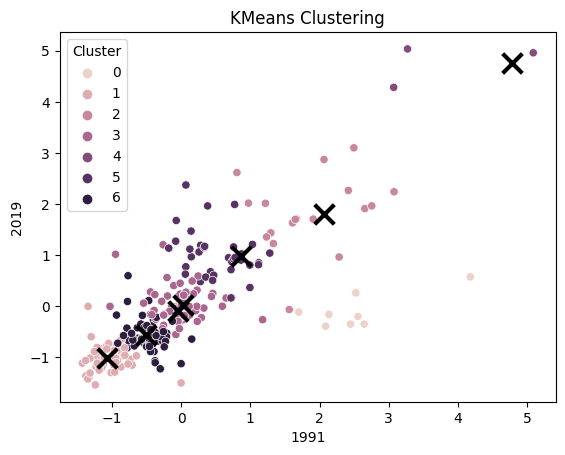

In [36]:
sns.scatterplot(data=data, x='2009', y='2019', hue='Cluster')
plt.scatter(x=kmeans.cluster_centers_[:, 5], y=kmeans.cluster_centers_[:, 10], marker='x', s=200, linewidths=3, color='black')
plt.xlabel('1991')
plt.ylabel('2019')
plt.title('KMeans Clustering')

In [37]:
# Calculate the error ranges for the cluster centers
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"Cluster {i} center: {center}")
    param = ['x', 'y']
    sigma = 1
    lower, upper = err_ranges(center, func=lambda x, y: x + y, param=param, sigma=sigma)
    print(f"Error range for Cluster {i} center: [{lower}, {upper}]")

plt.show()

Cluster 0 center: [ 2.53281064 -0.08068782  0.09921124  0.75582065  0.04355873 -0.04212833
 -0.09924257 -0.16534323 -0.18383657 -0.10904622 -0.08860166]
Error range for Cluster 0 center: [-2, 2]
Cluster 1 center: [-1.03821911 -1.04175013 -1.04543474 -1.05807984 -1.05152342 -1.06961772
 -1.08094886 -1.04297866 -1.01505094 -1.01547724 -1.00498703]
Error range for Cluster 1 center: [-2, 2]
Cluster 2 center: [1.83284622 2.21551438 2.20753656 2.09520394 2.16281957 2.06153753
 2.00767284 1.89774765 1.90716534 1.87714985 1.81585876]
Error range for Cluster 2 center: [-2, 2]
Cluster 3 center: [-0.02071101  0.02686027  0.0166704   0.01228218  0.02576599  0.02924096
  0.02761271  0.04449205  0.02702524  0.02298171  0.0195846 ]
Error range for Cluster 3 center: [-2, 2]
Cluster 4 center: [3.8090164  4.5135814  4.44084343 4.62042179 4.76504268 4.77756552
 4.54508566 4.98422578 5.10977    4.965895   4.75941272]
Error range for Cluster 4 center: [-2, 2]
Cluster 5 center: [0.52221659 0.67058468 0.7195

# Next check

In [40]:
# Load the dataset for Curve Fit
df1 = pd.read_csv('/content/gdrive/My Drive/Project/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_5455265.csv')

In [41]:
# Select the columns to be used for modeling
cols1 = ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


In [47]:
# Impute NaN values with the mean of the corresponding column
df1[cols1] = df1[cols1].fillna(df1[cols1].mean())

# Define a simple model function
def model_func(x, a, b, c):
    return np.polyval([a, b, c], x)
    

In [48]:
# Fit the model to the data
x_data = np.array(df1['2019'])
y_data = np.array(df1['2009'])
popt, pcov = curve_fit(model_func, x_data, y_data)

In [49]:
# Make predictions for future years
x_pred = np.arange(2022, 2031)
y_pred = model_func(x_pred, *popt)

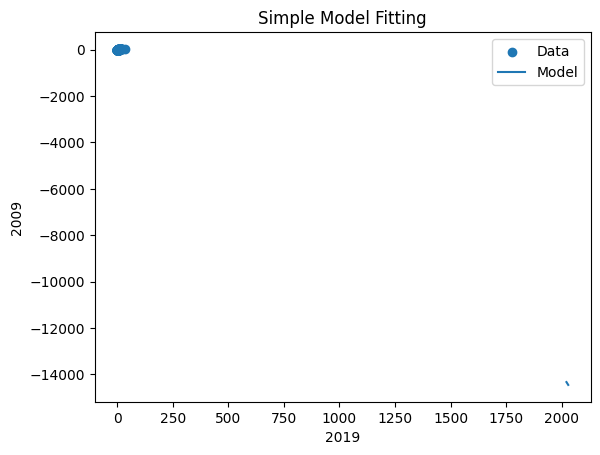

In [50]:
# Plot the data and the model predictions
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_pred, y_pred, label='Model')
plt.xlabel('2019')
plt.ylabel('2009')
plt.title('Simple Model Fitting')
plt.legend()
plt.show()